In [1]:
import os
import pandas as pd
from glob import glob
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Inputs

In [2]:
# Read  prms ET
prms = pd.read_csv('../../model/results/nhru_summary.csvhru_actet.csv',delimiter=',',index_col=0)

In [3]:
# read modified shapefile
gdf = gpd.read_file('../../geospacial/PRMS_corrected_shapefile.shp')

### Read MODIS


In [4]:
# Directory containing CSV files
directory = '../../../../../../Validation/prms_mean/MOD16A3GF.061/'

# Initialize an empty dataframe to store the merged data
merged_df = pd.DataFrame()

# Get a list of all CSV files in the directory
csv_files = glob(os.path.join(directory, '*.csv'))

In [5]:
# Iterate through each CSV file in the directory
for file_name in csv_files[:]:  # Make a copy of the list to iterate over
    # Read the CSV file into a dataframe
    df = pd.read_csv(file_name, index_col=0)
    
    # Extract the index and column name from the file name
    index_name = os.path.splitext(os.path.basename(file_name))[0]
    
    # If merged_df is empty, directly assign df to it
    if merged_df is None:
        merged_df = df
    else:
        # Merge only the first column of df with merged_df based on the index
        merged_df[index_name] = df.iloc[:, 0]
    
    # Remove the processed file from the list
    csv_files.remove(file_name)

In [6]:
# Rename columns to year
new_columns = {}
for column in merged_df.columns:
    year = column.split('_')[-1]  # Extract year from column name
    new_columns[column] = int(year)  # Convert year to integer and assign as new column name
merged_df.rename(columns=new_columns, inplace=True)

In [7]:
# Sort DataFrame by column names (years)
merged_df = merged_df.sort_index(axis=1)

In [8]:
# Multiply every value in the DataFrame by 0.1
obs_scaled = merged_df * 0.1

In [9]:
obs_scaled

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
nhm_id,,,,,,,,,,,,,,,
95965,650.444775,668.081152,663.399463,693.243408,683.947900,651.767041,630.709277,662.210254,667.182324,695.553174,695.717578,672.378223,657.762158,683.948682,626.102686
95966,755.304639,768.458691,770.614893,791.208252,783.191016,766.613770,735.335742,755.082324,759.342334,778.098779,780.455469,767.900049,751.094238,778.210742,717.716064
95968,422.760352,424.171240,430.771143,472.605176,459.902734,433.356348,415.474609,434.910303,439.371973,468.725586,465.019873,449.279443,428.425732,457.425830,404.953857
95969,408.382227,428.819678,424.328174,487.524902,457.080566,409.748193,395.855469,427.044678,434.973779,475.585889,465.281982,440.381885,412.107178,455.414795,384.581885
95970,519.244092,548.139404,530.642139,566.240381,559.685938,520.952637,502.834717,529.807813,529.141504,553.759912,559.908350,539.063135,511.926416,544.361572,485.709082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96139,349.914331,476.891113,425.842139,452.027881,476.887793,479.073340,441.287109,491.293750,454.897314,473.325342,484.128467,503.969775,493.138525,515.958057,470.034619
96959,295.801343,382.630981,354.899609,358.825781,391.657056,376.893555,324.612598,355.502173,366.583960,387.257324,391.236230,364.892358,383.999438,400.586035,349.269482
96978,295.967651,379.625659,367.076611,367.323730,388.234668,385.454761,349.248047,369.814990,372.906226,387.074536,392.982520,371.243457,392.218701,394.224390,357.208521


In [10]:
# Extract two columns from GeoDataFrame to create a renaming key
renaming_key = gdf[['nhm_id', 'model_hru_']]

In [11]:
# Set 'nhm_id' as the index in renaming key DataFrame
renaming_key.set_index('nhm_id', inplace=True)

In [12]:
# Rename index values in DataFrame using the renaming key
obs_scaled.index = obs_scaled.index.map(renaming_key['model_hru_'])

In [13]:
# Convert index to integers
obs_scaled.index = obs_scaled.index.astype(int)

# Sort index in ascending order
obs_scaled = obs_scaled.sort_index()

In [14]:
obs_scaled = obs_scaled.transpose()

In [15]:
# Remove index title
obs_scaled.index.name = None

In [16]:
# Convert column headers to integers
obs_scaled.columns = obs_scaled.columns.astype(int)

In [17]:
obs_scaled

nhm_id,1,2,3,4,5,6,7,8,9,10,...,900,901,902,903,904,905,906,907,908,909
2001,650.444775,755.304639,422.760352,408.382227,519.244092,405.405371,398.155640,737.407764,429.525586,1069.089941,...,207.985107,214.454395,222.518750,231.627246,233.883472,229.218457,234.289844,239.893140,325.126611,332.379932
2002,668.081152,768.458691,424.171240,428.819678,548.139404,444.454834,434.445410,764.452295,452.005908,1099.782813,...,311.033862,324.719604,325.680859,332.013550,333.409619,346.960815,346.172388,341.544458,417.828809,421.797021
2003,663.399463,770.614893,430.771143,424.328174,530.642139,421.768164,419.525098,740.848047,449.568555,1087.782422,...,250.908496,262.224561,276.733740,284.634668,285.463794,295.277930,298.545728,298.564233,384.601978,386.404639
2004,693.243408,791.208252,472.605176,487.524902,566.240381,456.133350,427.235156,758.633350,471.358594,1088.180371,...,274.925146,287.770947,300.685840,310.019727,314.057495,316.325317,323.842651,323.797461,397.790991,391.948511
2005,683.947900,783.191016,459.902734,457.080566,559.685938,451.202051,434.458594,767.169775,471.478857,1098.616797,...,268.401807,286.779126,305.621924,319.705298,325.085474,326.991577,336.201367,333.540112,407.424023,409.964600
2006,651.767041,766.613770,433.356348,409.748193,520.952637,430.338770,427.578320,755.345996,446.004102,1105.648145,...,265.647632,277.549048,289.171069,301.690845,303.632300,314.368604,316.706934,316.456787,404.184082,410.757129
2007,630.709277,735.335742,415.474609,395.855469,502.834717,416.783545,425.617432,716.683789,430.030469,1097.123242,...,275.385498,295.873022,298.930957,304.349805,307.087476,304.231104,329.585596,329.207471,435.151318,432.642041
2008,662.210254,755.082324,434.910303,427.044678,529.807813,436.439404,415.717480,740.125635,450.738965,1115.983789,...,263.789966,280.141553,285.761108,299.090845,302.551904,299.706250,316.503442,320.034155,405.509473,400.572021
2009,667.182324,759.342334,439.371973,434.973779,529.141504,430.426318,428.080908,741.537598,454.693750,1114.760937,...,259.413037,278.105566,285.372461,297.982837,304.725000,309.342041,316.013159,319.030249,389.656519,392.216309
2010,695.553174,778.098779,468.725586,475.585889,553.759912,461.995801,445.713916,769.229004,469.336035,1111.450488,...,286.356079,302.399365,323.268994,338.982300,343.870947,348.870435,357.816040,358.516772,423.555811,423.210986


### Analysis

In [18]:
# Convert index to datetime format
prms.index = pd.to_datetime(prms.index)

# Trim dataframe to include only data from 2001 to 2015
prms = prms['2001':'2015']

In [19]:
# Convert index to datetime
prms.index = pd.to_datetime(prms.index)

# Resample to yearly by summing
prms = prms.resample('Y').sum()

In [20]:
# convert PRMS from inches to mm
prms= prms * 25.4

In [21]:
# Convert index to datetime
prms.index = pd.to_datetime(prms.index)

# Extract year from datetime index and convert it to integer
prms.index = prms.index.year.astype(int)

In [22]:
# Remove index title
prms.index.name = None

In [23]:
# Convert column headers to integers
prms.columns = prms.columns.astype(int)

In [24]:
prms

,1,2,3,4,5,6,7,8,9,10,...,900,901,902,903,904,905,906,907,908,909
2001,306.046956,360.058818,472.542806,362.697918,420.056208,395.909030,334.581605,339.669408,401.577579,318.126221,...,183.225171,172.750008,170.071456,178.874062,201.982743,198.066955,251.538588,237.185838,411.173483,354.931190
2002,356.671480,400.111290,514.111199,467.764429,480.033244,394.115765,394.069731,409.594071,429.241632,463.834788,...,332.658253,302.121593,316.928937,289.491583,398.631560,373.670271,442.495178,411.988513,622.725506,525.728146
2003,314.149299,385.640504,497.549446,420.241599,425.313076,413.001757,357.223066,288.959700,442.978044,283.542559,...,267.572668,261.242858,255.137704,234.118851,301.471902,312.319271,399.684240,363.441404,528.679758,450.841643
2004,355.296647,491.396274,541.238346,551.832409,497.415645,417.376397,443.640564,371.767564,459.908063,539.323855,...,330.031849,305.916460,282.698480,299.217514,423.773404,392.337442,459.321840,443.558447,617.554107,508.137145
2005,309.275801,462.141316,503.682374,419.250362,446.048552,393.990032,441.732211,455.505542,388.011922,348.470422,...,233.248347,258.432084,283.075477,269.136810,360.012488,343.032956,456.139654,392.182083,584.503591,517.978072
2006,312.840252,398.372000,510.267013,438.519874,435.625265,418.052399,367.042054,399.062967,422.908663,432.321365,...,150.166857,143.049567,160.994880,170.828271,203.864896,205.081911,298.102858,266.095683,489.099784,405.560936
2007,323.075014,462.363312,562.609372,447.439391,480.300200,435.698790,356.521581,407.104548,441.380242,296.721961,...,227.337264,226.975352,231.101986,215.711164,281.186334,256.123374,359.134283,342.321177,506.875880,461.487812
2008,357.925252,435.389757,546.075871,467.190213,440.333816,408.561349,351.787599,387.614358,454.699832,281.279534,...,274.455712,292.839224,304.195932,305.078376,346.073959,337.591481,420.835369,371.224317,541.233472,463.060461
2009,370.836503,436.425924,513.040970,426.121401,443.576146,422.481348,425.303958,442.217803,457.052198,437.065740,...,373.718224,272.929167,279.642402,278.622940,460.737572,442.495031,521.359943,482.375921,606.045491,522.452445
2010,357.996172,443.787809,547.170769,495.055097,479.185643,395.331408,420.354748,449.774060,448.817203,274.302034,...,440.380755,329.963676,330.973684,336.337415,485.910133,460.973297,508.703555,480.399402,583.761380,481.700205


In [25]:
# Create a new DataFrame `difference` by subtracting `sca` from `hype`
# change this operation to whatever you want
difference= prms - obs_scaled

In [26]:
difference

,1,2,3,4,5,6,7,8,9,10,...,900,901,902,903,904,905,906,907,908,909
2001,-344.397820,-395.245821,49.782455,-45.684309,-99.187883,-9.496341,-63.574035,-397.738355,-27.948007,-750.963720,...,-24.759937,-41.704387,-52.447294,-52.753184,-31.900729,-31.151502,17.248744,-2.707302,86.046872,22.551258
2002,-311.409673,-368.347401,89.939958,38.944751,-68.106161,-50.339069,-40.375679,-354.858224,-22.764276,-635.948025,...,21.624390,-22.598012,-8.751922,-42.521967,65.221941,26.709456,96.322790,70.444055,204.896697,103.931124
2003,-349.250164,-384.974389,66.778303,-4.086575,-105.329062,-8.766407,-62.302032,-451.888347,-6.590510,-804.239862,...,16.664172,-0.981702,-21.596036,-50.515817,16.008108,17.041342,101.138512,64.877171,144.077780,64.437005
2004,-337.946761,-299.811978,68.633170,64.307507,-68.824736,-38.756953,16.405408,-386.865786,-11.450531,-548.856516,...,55.106703,18.145512,-17.987360,-10.802212,109.715909,76.012125,135.479188,119.760986,219.763115,116.188634
2005,-374.672099,-321.049700,43.779640,-37.830204,-113.637386,-57.212019,7.273617,-311.664233,-83.466935,-750.146375,...,-35.153459,-28.347042,-22.546447,-50.568488,34.927014,16.041379,119.938287,58.641971,177.079568,108.013473
2006,-338.926789,-368.241770,76.910665,28.771680,-85.327371,-12.286370,-60.536267,-356.283029,-23.095438,-673.326779,...,-115.480774,-134.499481,-128.176189,-130.862573,-99.767404,-109.286692,-18.604075,-50.361104,84.915702,-5.196193
2007,-307.634264,-272.972430,147.134763,51.583922,-22.534517,18.915245,-69.095850,-309.579241,11.349773,-800.401282,...,-48.048234,-68.897670,-67.828971,-88.638641,-25.901142,-48.107730,29.548687,13.113706,71.724561,28.845771
2008,-304.285002,-319.692568,111.165568,40.145536,-89.473997,-27.878055,-63.929881,-352.511277,3.960867,-834.704255,...,10.665746,12.697671,18.434824,5.987532,43.522054,37.885231,104.331926,51.190162,135.723999,62.488439
2009,-296.345821,-322.916410,73.668997,-8.852378,-85.565358,-7.944970,-2.776951,-299.319794,2.358448,-677.695198,...,114.305187,-5.176399,-5.730059,-19.359897,156.012572,133.152990,205.346784,163.345672,216.388972,130.236136
2010,-337.557002,-334.310970,78.445183,19.469208,-74.574269,-66.664393,-25.359168,-319.454944,-20.518832,-837.148454,...,154.024676,27.564311,7.704690,-2.644885,142.039186,112.102862,150.887515,121.882630,160.205570,58.489219


In [27]:
mean_annual_difference= difference.mean()

In [28]:
# Convert difference Series to a DataFrame
mean_annual_difference_df = pd.DataFrame(mean_annual_difference, columns=['Mean'])

In [29]:
mean_annual_difference_df.max()

Mean    314.035715
dtype: float64

In [30]:
mean_annual_difference_df.min()

Mean   -5961.806012
dtype: float64

In [31]:
mean_annual_difference_df.mean()

Mean   -35.94424
dtype: float64

In [32]:
# Find the index of the minimum value
min_index=mean_annual_difference_df.idxmin()
min_index

Mean    277
dtype: int64

### Plot heatmap

In [33]:
# Merge column_means_df onto gdf by the index in column_means_df and seg_nhm column in gdf
merged_gdf = gdf.merge(mean_annual_difference_df, left_on='model_hru_', right_index=True)

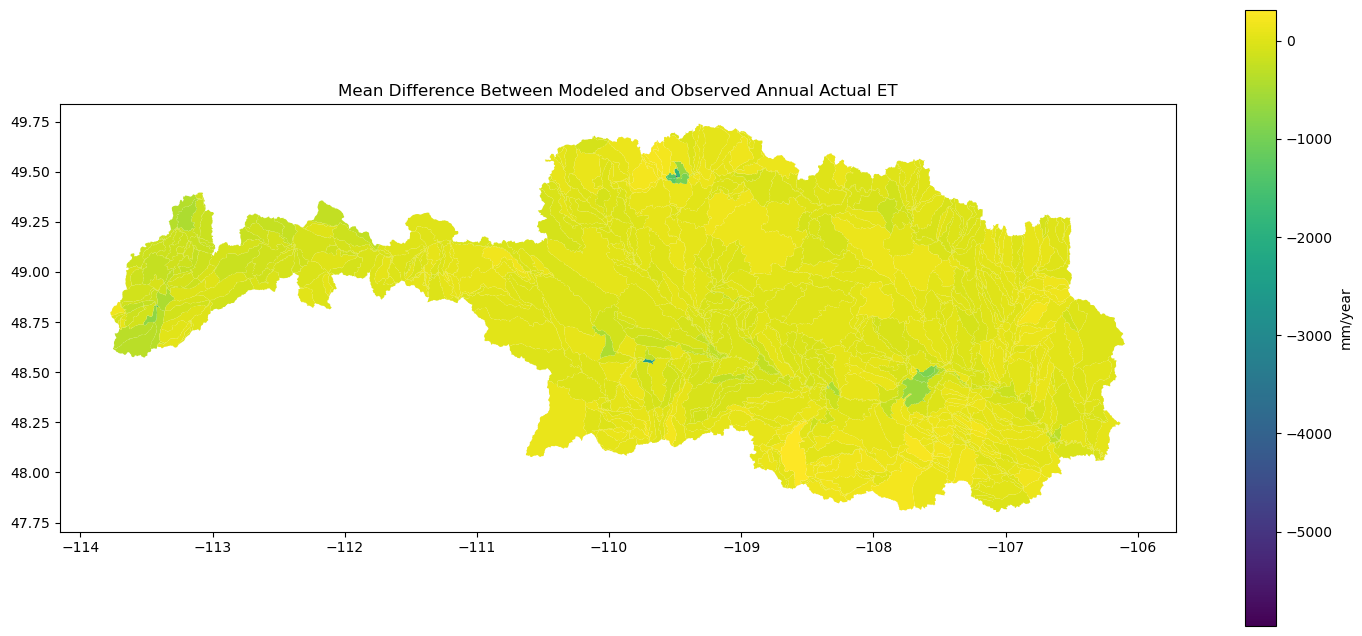

In [35]:
# Plot a heatmap of the 'Mean' column with adjusted figure size
ax = merged_gdf.plot(column='Mean', cmap='viridis', legend=True, figsize=(18, 8))

# Add title to the plot
ax.set_title('Mean Difference Between Modeled and Observed Annual Actual ET')

# Get the color bar instance
cbar = ax.get_figure().get_axes()[1]

# Add units to the color bar
cbar.set_ylabel('mm/year')

# Save the plot as PNG to a specific location
plt.savefig('../../model/plots/et.png')

# Show the plot
plt.show()